In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# pd.set_option('display.max_columns', None)

# House Pricing Project
## We will take a journey through house pricing dataset, to take a good look and analyze what we got here. Maybe we will try a Machine Learning, 

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Check columns name

In [3]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. Check NaN in columns

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Check SalePrice value, how many rows, mean, min, max

In [5]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 4. Distribution of SalePrice by using Histogram chart

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

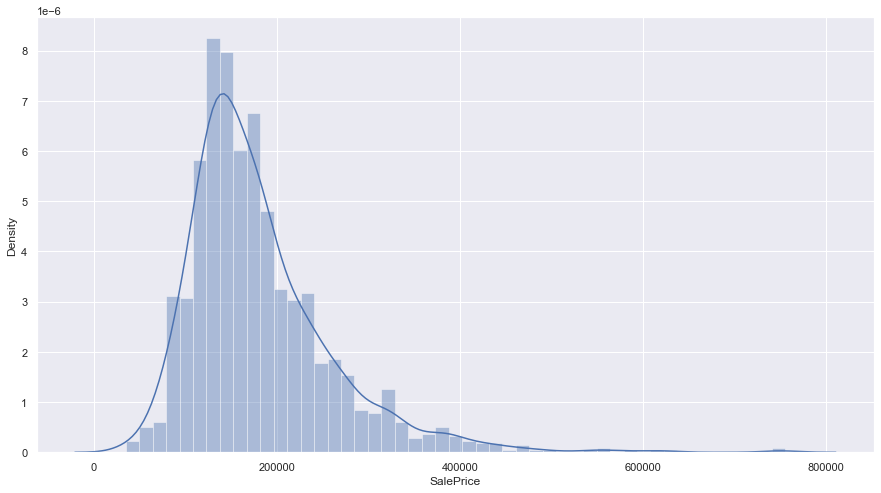

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(dataset['SalePrice'] )

#### As we can se that the house price about 15000$ is the most common

## 5. Checking null value in columns, with 1 is null, 0 has valid value, affect to SalePrice

In [7]:
data_with_na = [i for i in dataset.columns if dataset[i].isnull().sum()>1]

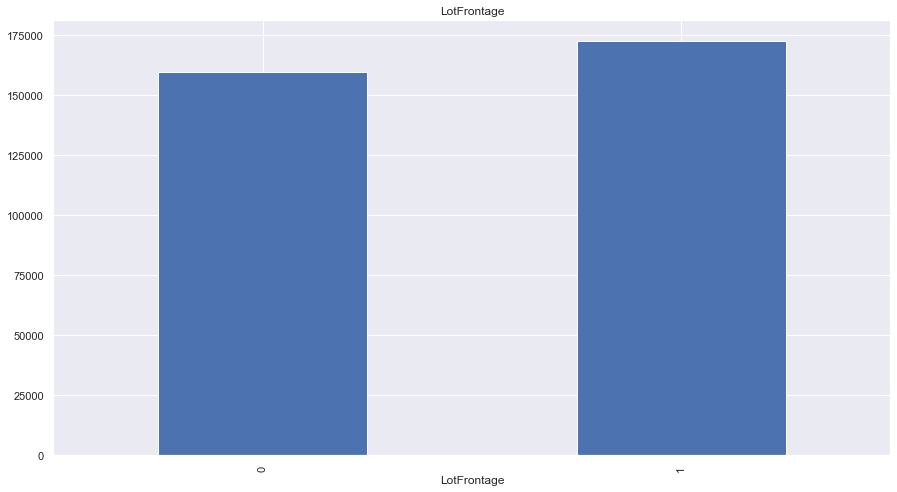

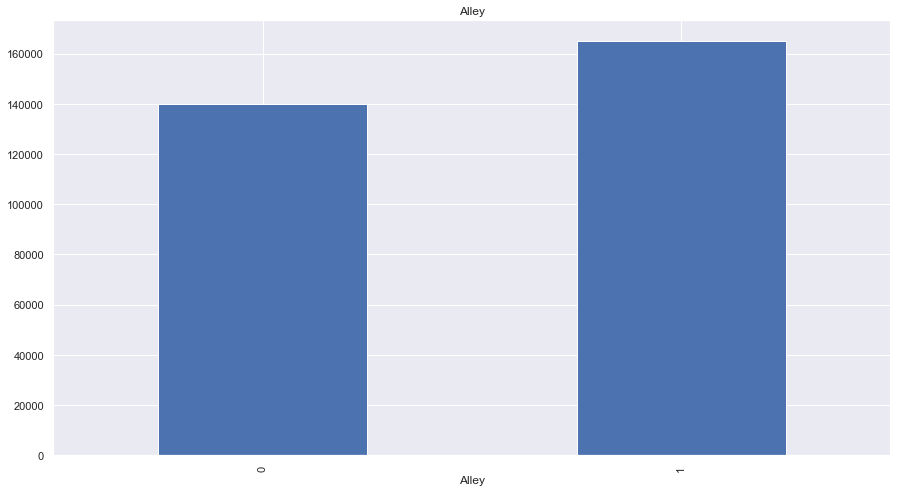

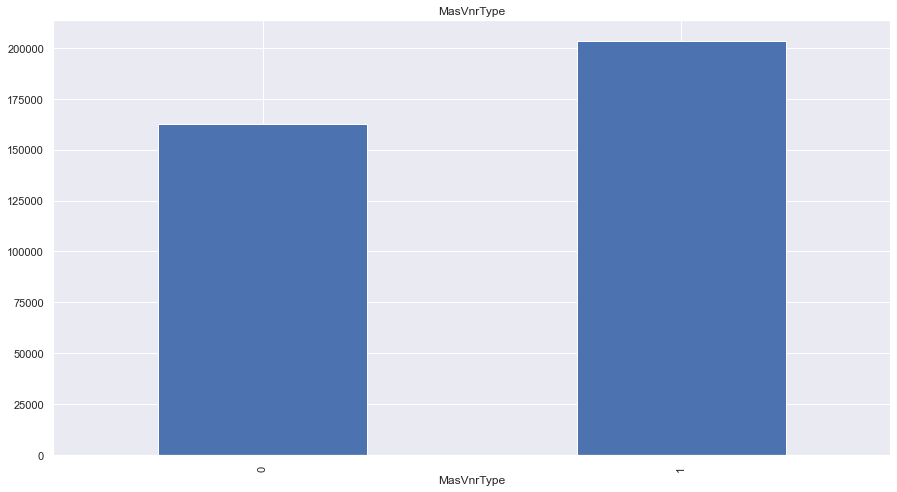

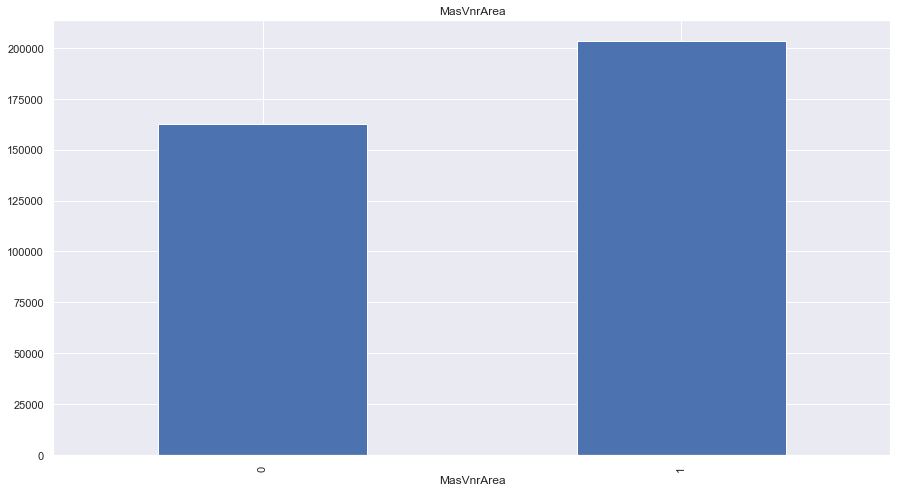

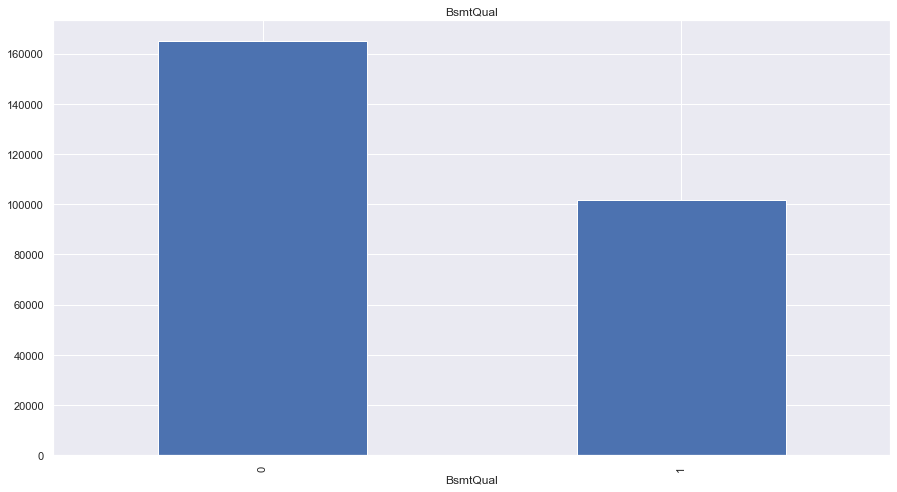

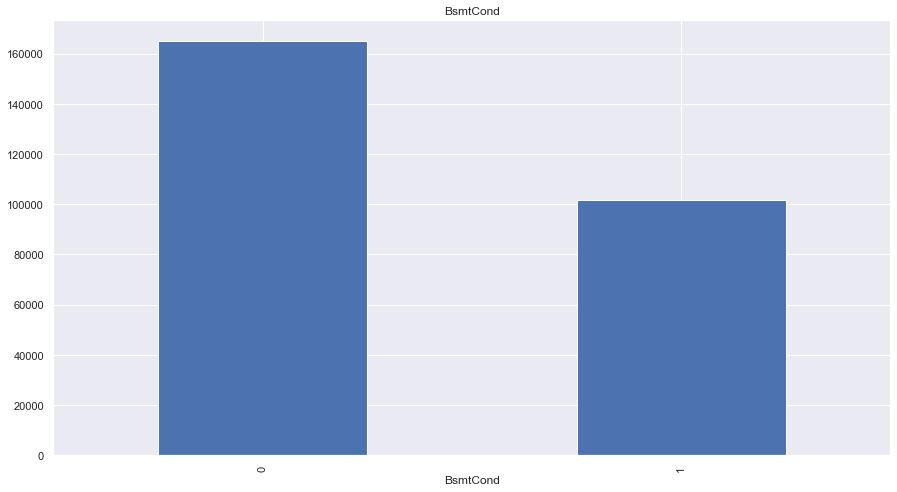

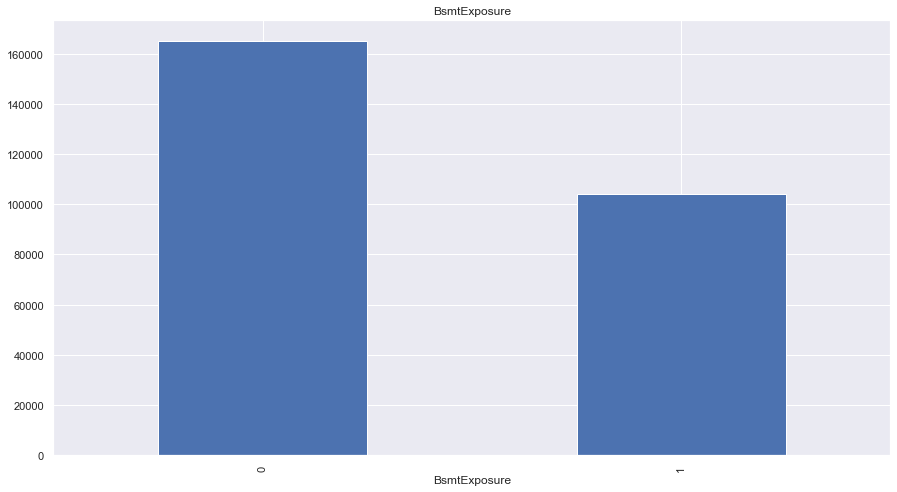

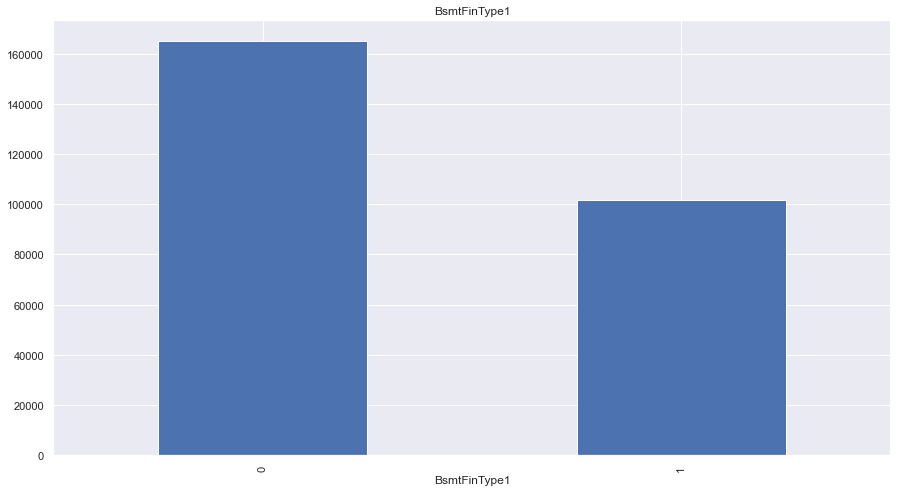

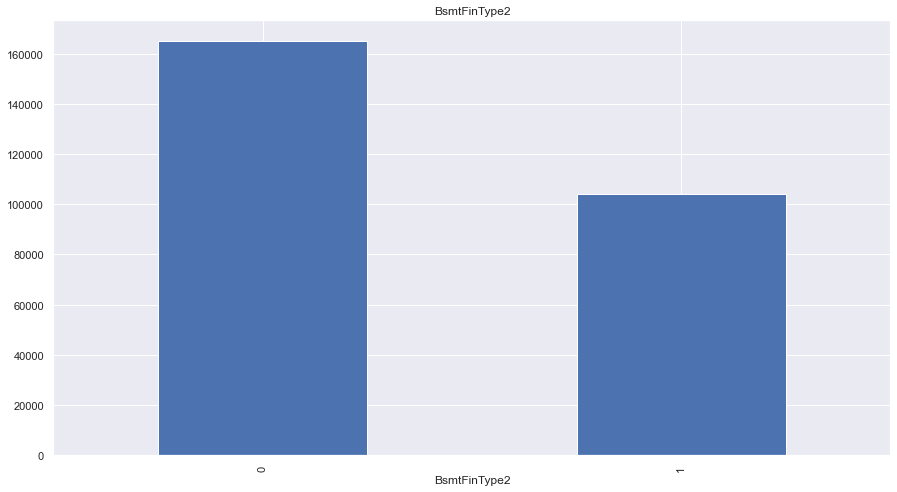

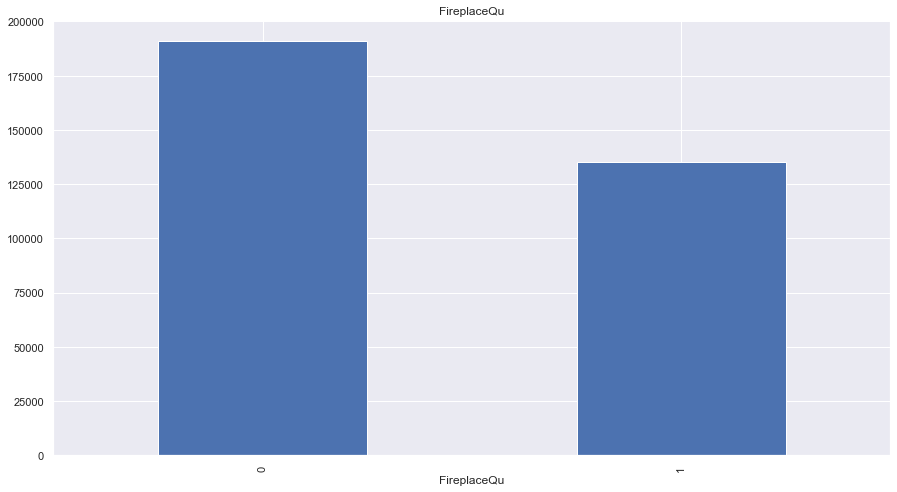

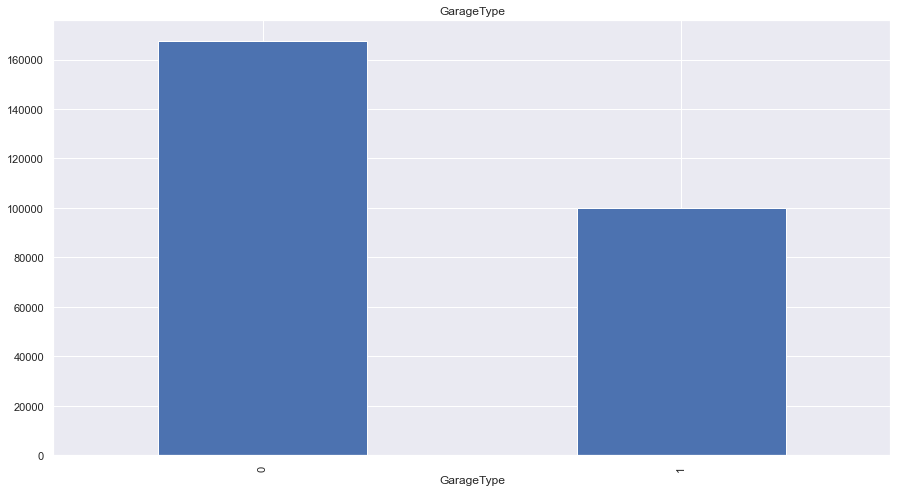

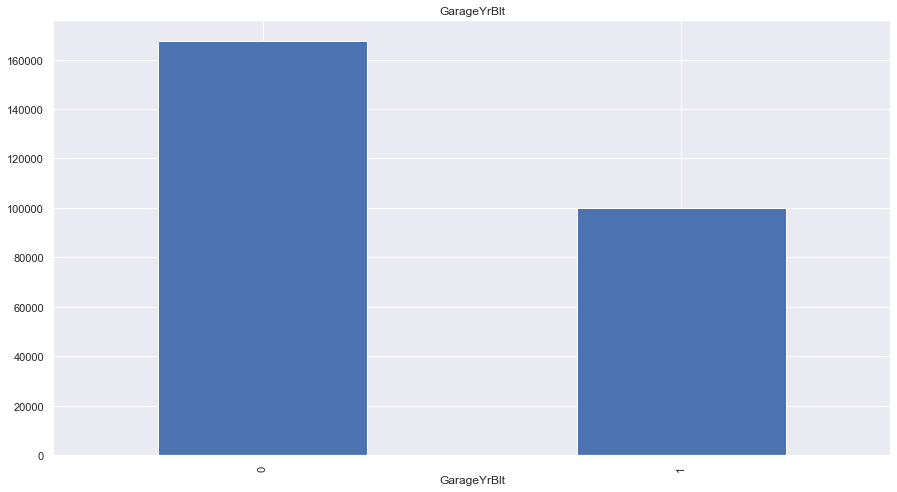

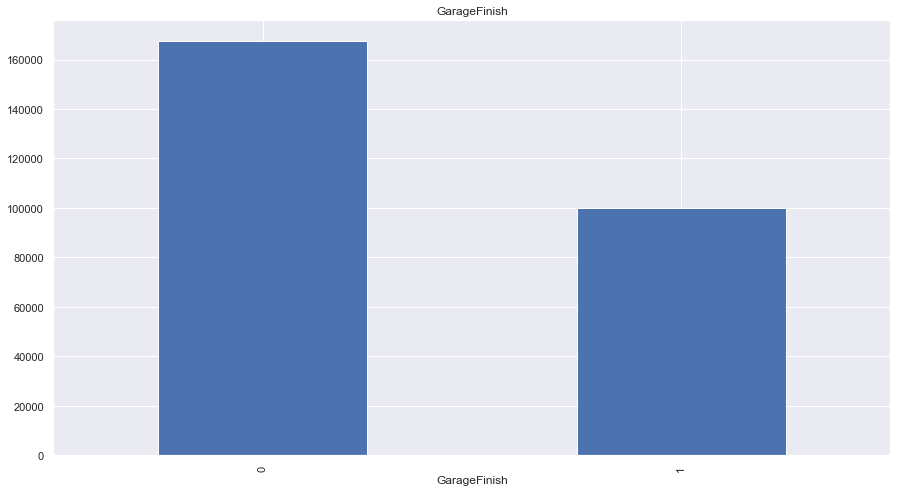

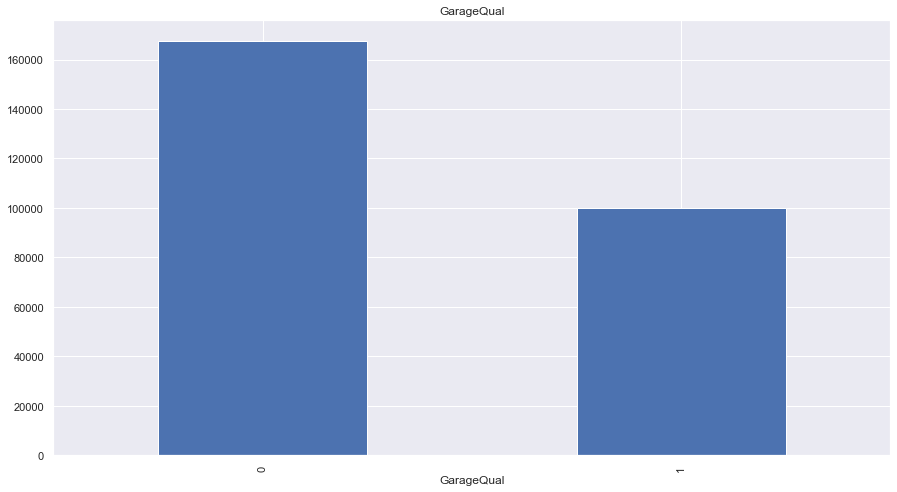

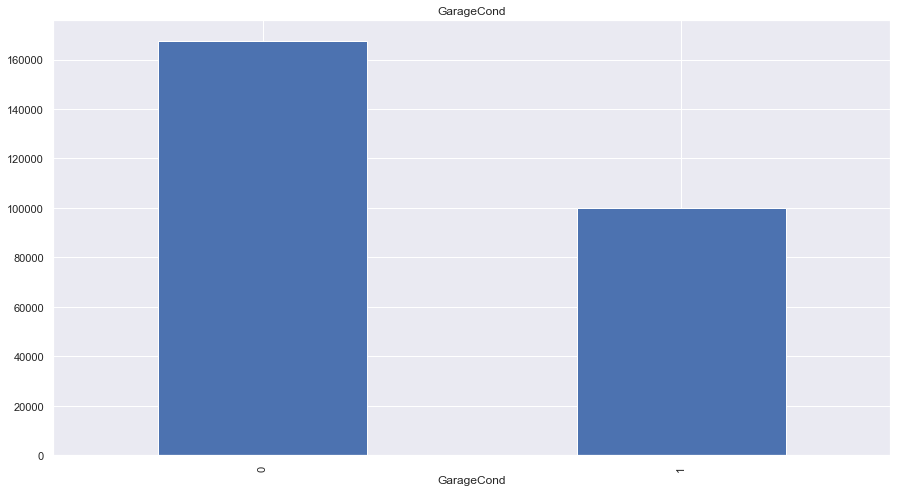

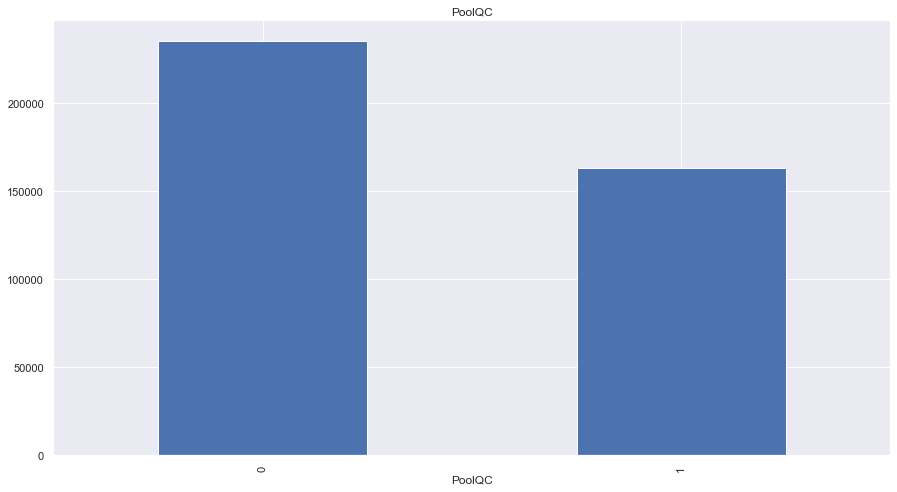

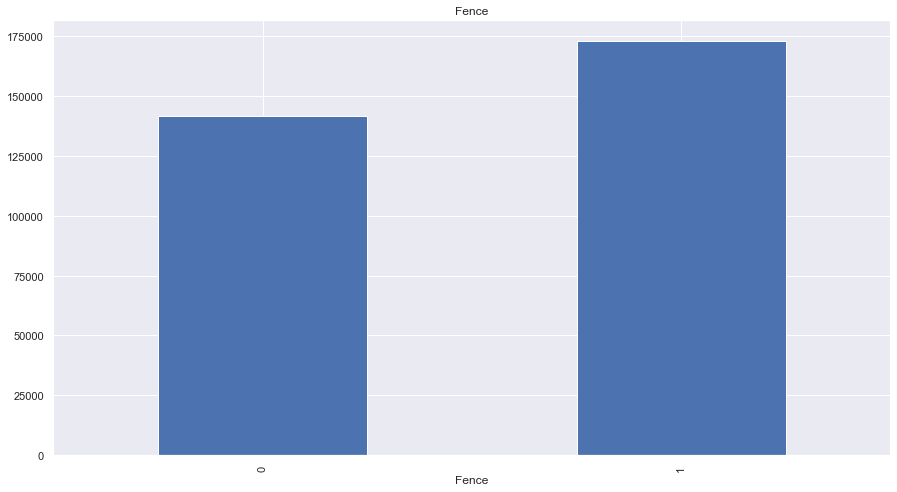

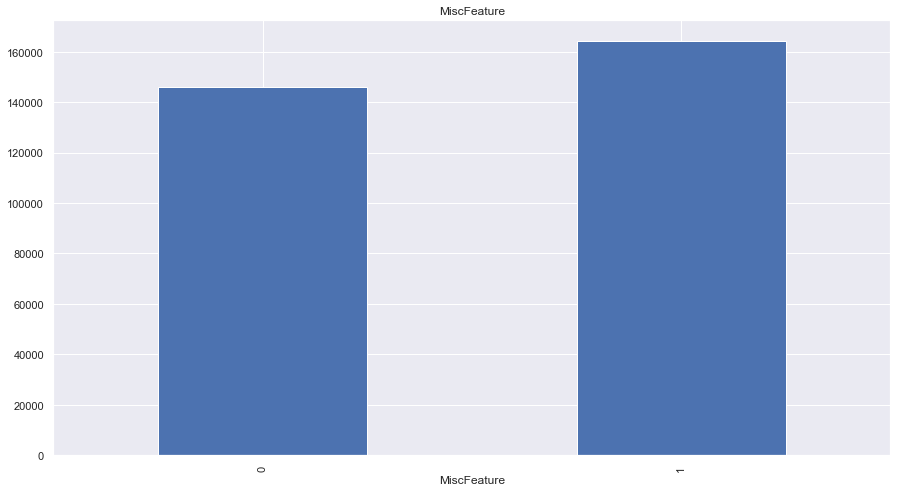

In [8]:
for na in data_with_na:
    data1 = dataset.copy()
    data1[na] = np.where(dataset[na].isnull(),1,0)
    data1.groupby(na)['SalePrice'].median().plot.bar()
    plt.title(na)
    plt.show()

## 6. The relationship between SalePrice and GrLivArea (Ground Living Area, it is calculated by Square Feet)
### Which means the price is higher when GrLivArea expands, that's a common sense right? We can see they have linear relationship. But there are some ouliers, we will get that later

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

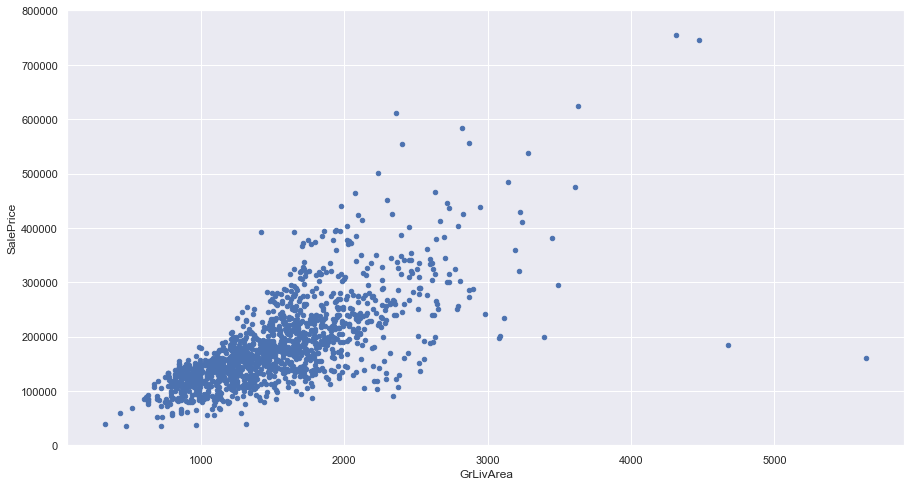

In [9]:
df_sale_area = pd.concat([dataset['SalePrice'], dataset['GrLivArea']], axis =1)
df_sale_area.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim = (0,800000))

## 7. The relationship betwwen SalePrice and TotalBsmtSF (Total basement area by Square Feet)
### They really connect with each other, lower SalePrice has smaller basement area. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

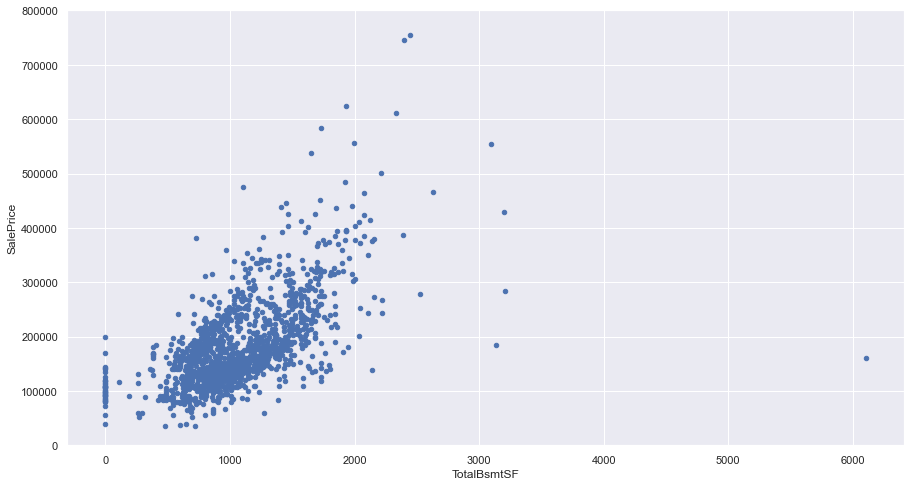

In [10]:
df_sale_area = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis =1)
df_sale_area.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0,800000))

## 8. Using boxplot to identify the connection of SalePrice and OverallQual (House's overall quality)

(-0.5, 9.5, 0.0, 800000.0)

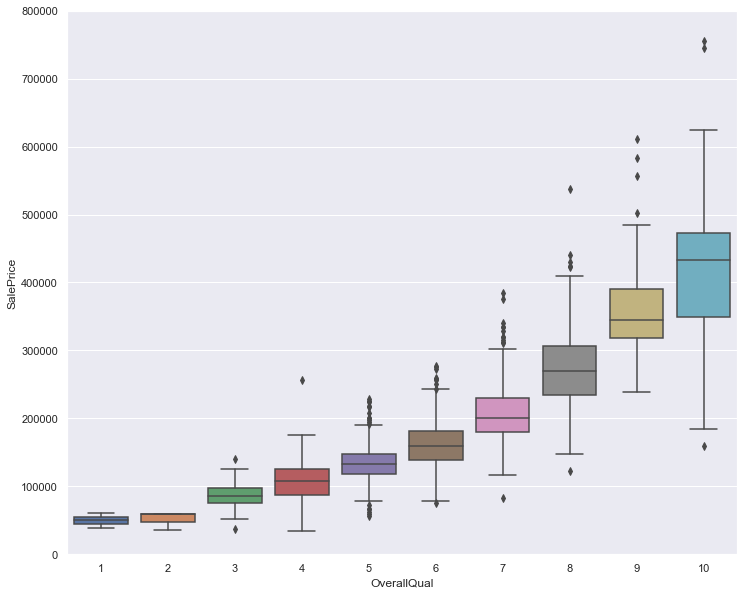

In [11]:
df2 = pd.concat([dataset['SalePrice'], dataset['OverallQual']], axis =1)
f, ax = plt.subplots(figsize = (12,10))
fig =sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = dataset)
fig.axis(ymin = 0, ymax =800000)

#### - They are really connected, the box with the line between them is the median price, top of the box is median of highest price, lower is median of lowest price. For example take the OverallQual 10: Median is 430000, Q1 = 480000, Q2 = 350000, highest price is 620000, lowest is 180000 and one outlier: 150000  

## 9. House price by year 

In [12]:
numberical = [i for i in dataset.columns if dataset[i].dtypes != 'O'] ## Filter out columns's data which isnt an Object
dataset[numberical].head()
year = [i for i in numberical if 'Yr' in i or 'Year' in i]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### House Price by Year Sold

Text(0.5, 1.0, 'House Price vs YearSold')

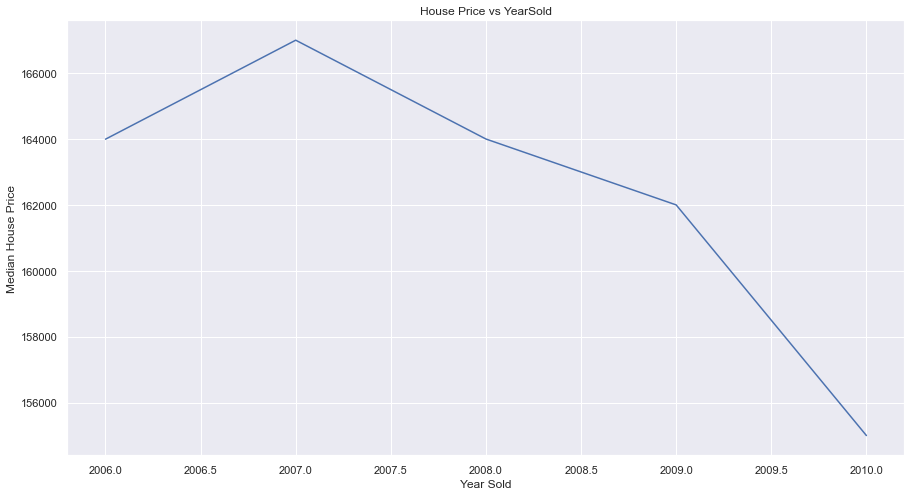

In [13]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

#### - The highest price was in year 2007, after Wolf of Wall Street crisis it dropped dramatically

### The price when it comes to how many year the house was built, remodeled and garage built

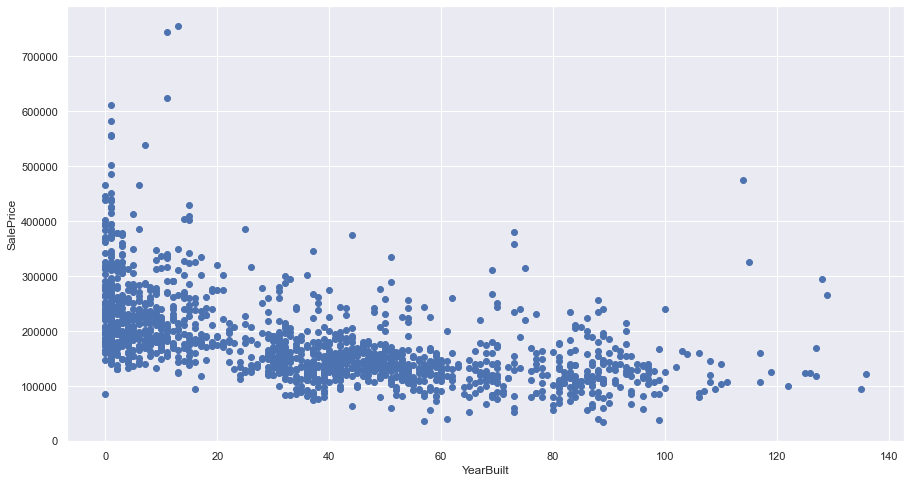

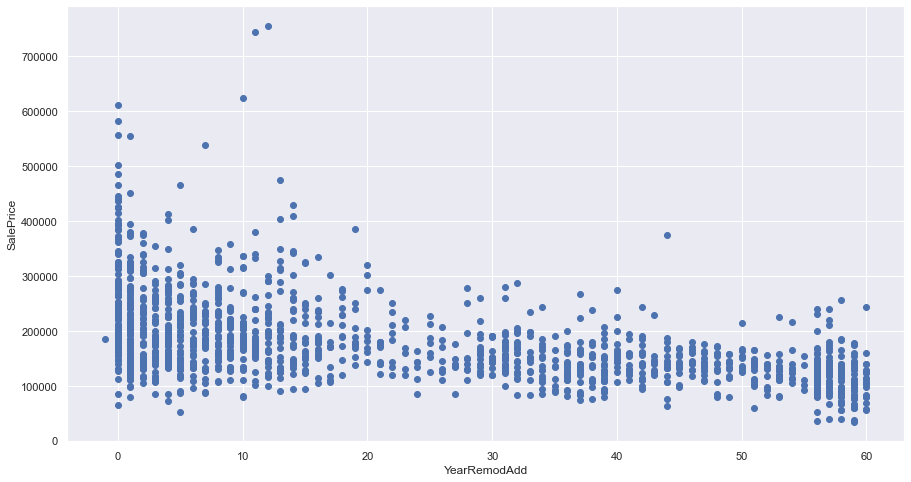

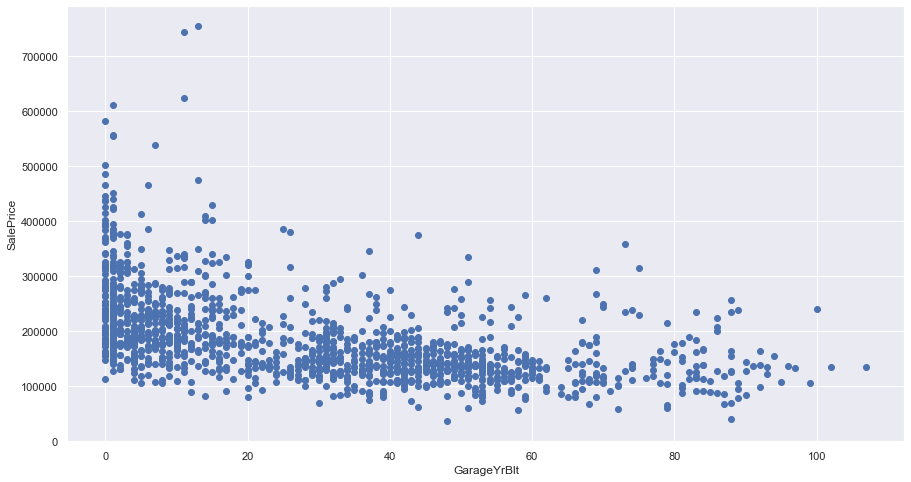

In [14]:
for i in year:
    if i!='YrSold':
        data=dataset.copy()
        data[i]=data['YrSold']-data[i]
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

#### - The 3 tables indicate the SalePrice with age of the houses, years since it was remodeled and years after building garage  
#### - Obviously, the newer the house the higher the price. The houses which are built recently will have the highest of all and the oldest house (built 138 years has pretty low price) 


## 10. Using heatmap to indicate which factors affect SalePrice

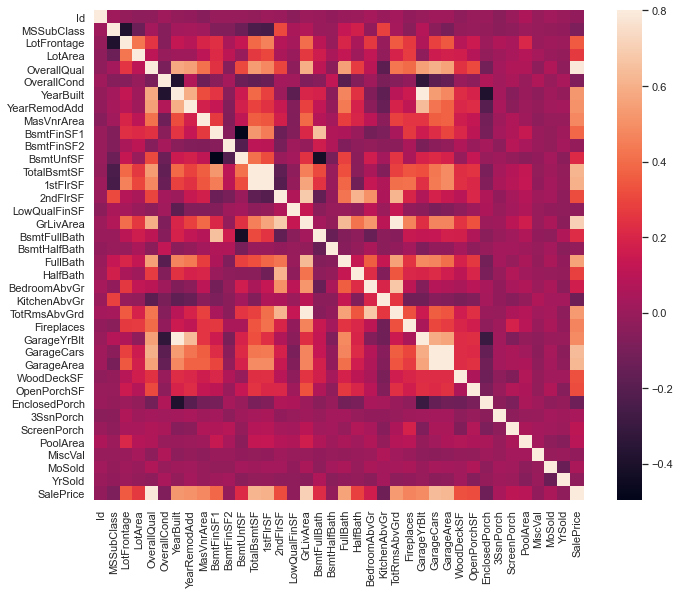

In [15]:
corr= dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

#### - By locating factor in X, Y axis. The map shows us which areas are 'hottest' with SalePrice

### The above map is little bit hard to see and has to many factors. We will limit it by 10 factors affect SalePrice 

<AxesSubplot:>

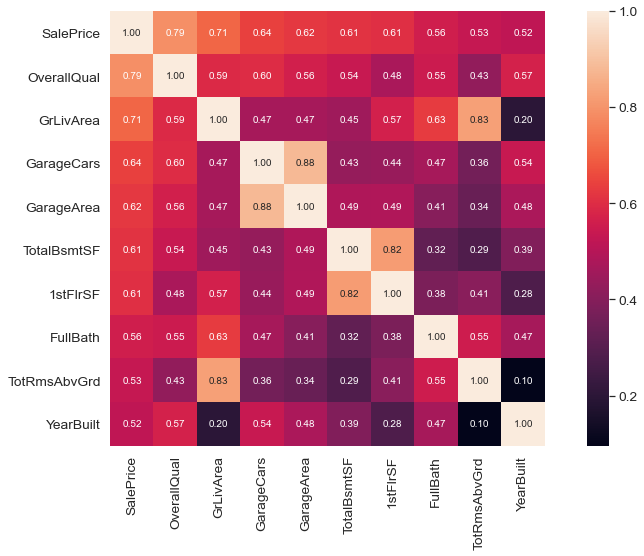

In [16]:
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale = 1.25)
sns.heatmap(cm, cbar = True, annot =True, square =True, fmt ='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels = cols.values)

#### - Now we got 10 fators, but we will need to consider those a little bit. Of course OverallQual is the highest factor of all, next is GrLivArea. But GarageCars (how many cars can be strored in garage) is related with GarageArea, isn't it? Bigger garage area can store more cars. 
#### - It's quite similar to TotalBsmtSF, 1stFlrSF (1st floor area) and TotalRmsAbvGrd (Total rooms above ground) so we will keep TotalBsmtSF
#### - Kinda weird that FullBath take important role than YearBuilt, but who am i to judge

### Let's see what connection between those factors

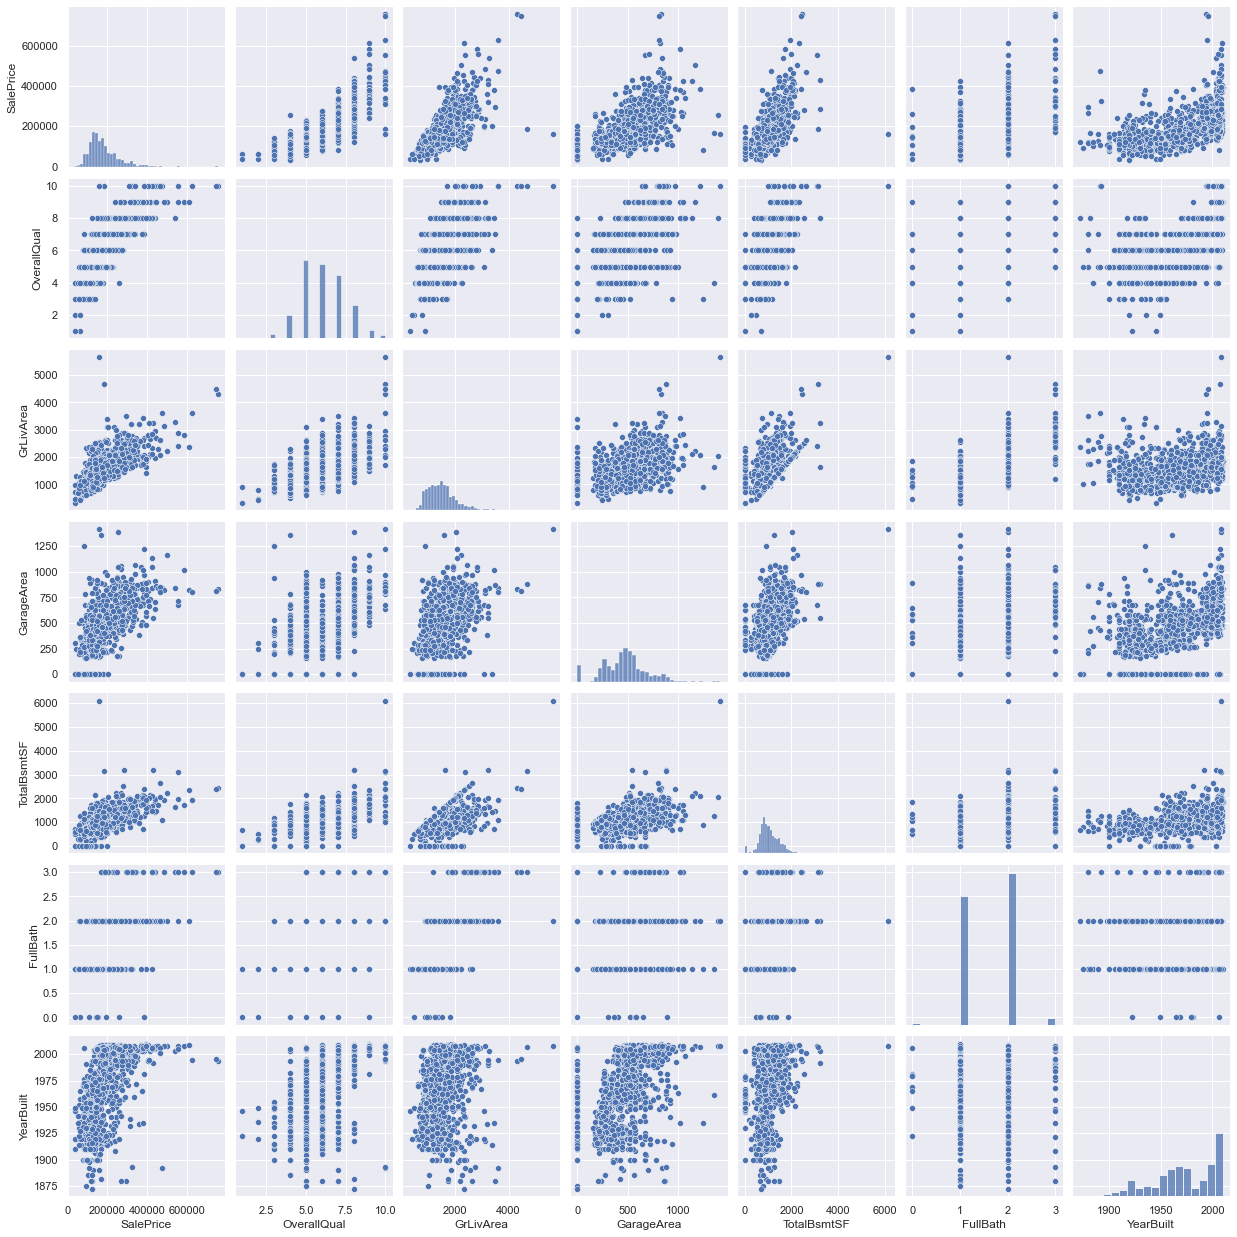

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataset[cols], size =2.5)
plt.show()

## Missing Data

In [18]:
df = dataset.copy()
total_na = df.isnull().sum().sort_values(ascending = False)
percent_na = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing = pd.concat([total_na, percent_na], axis =1, keys = ['total', 'percent'])
missing.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [19]:
df1 = df.drop((missing[missing['total'] > 1]).index, 1)

In [20]:
df1 = df1.drop((df1[df1['Electrical'].isnull()].index))

In [21]:
df1.isnull().sum().max()

0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

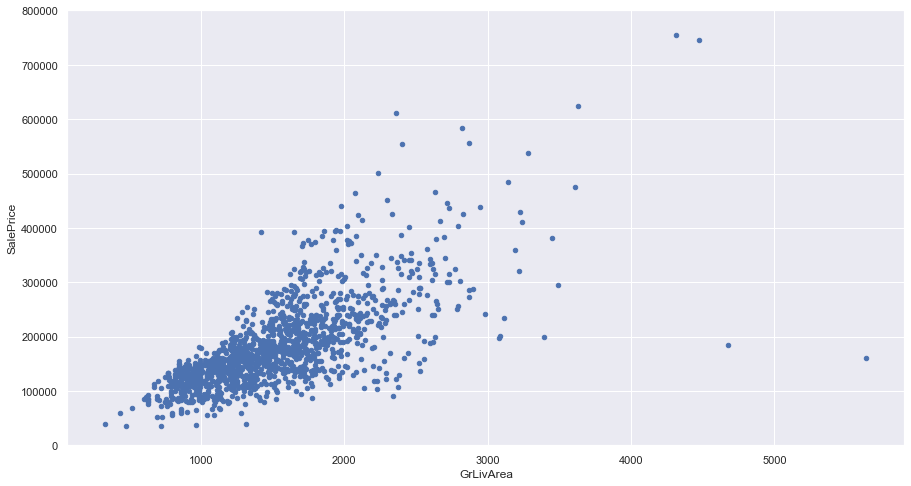

In [22]:
data = pd.concat([df1['SalePrice'], df1['GrLivArea']], axis =1, )
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice', ylim =(0,800000))

In [23]:
dataset.sort_values(by = 'GrLivArea', ascending = False)[0:2]
dataset = dataset.drop(dataset[dataset['Id'] == 1299].index)
dataset = dataset.drop(dataset[dataset['Id'] == 523].index)
dataset.sort_values(by = 'GrLivArea', ascending = False)[0:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

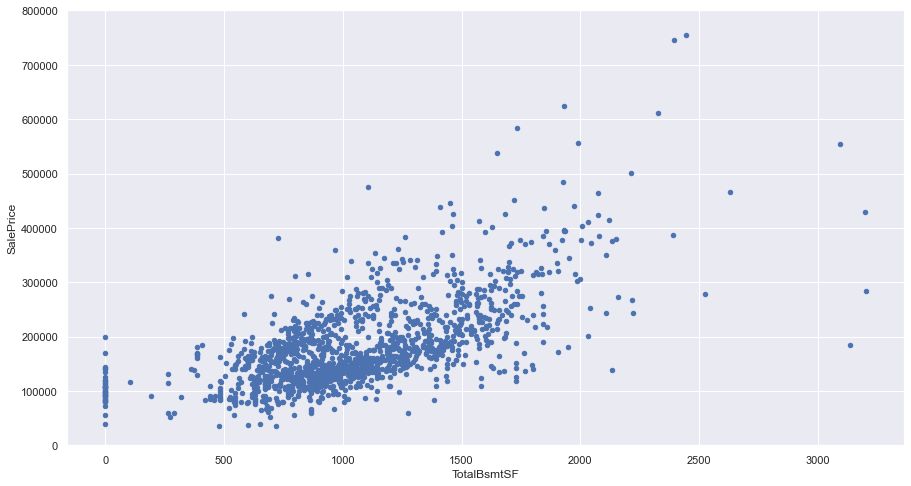

In [24]:
data = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim =(0, 800000))

In [25]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

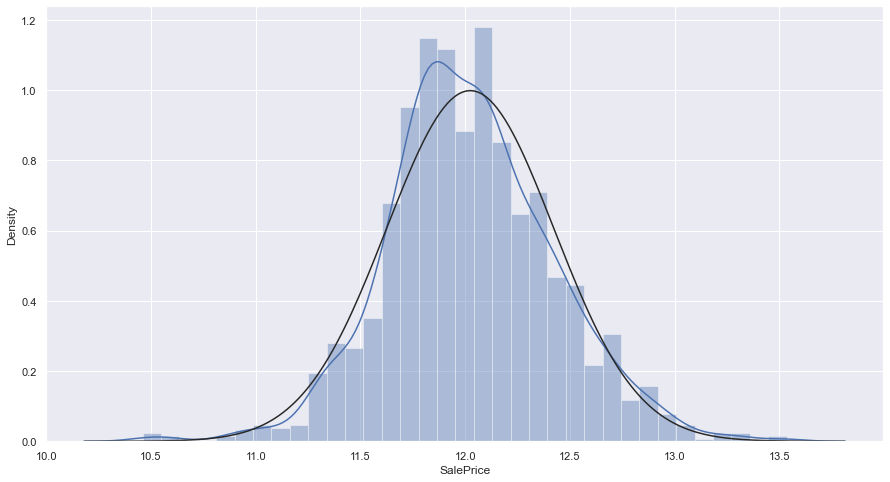

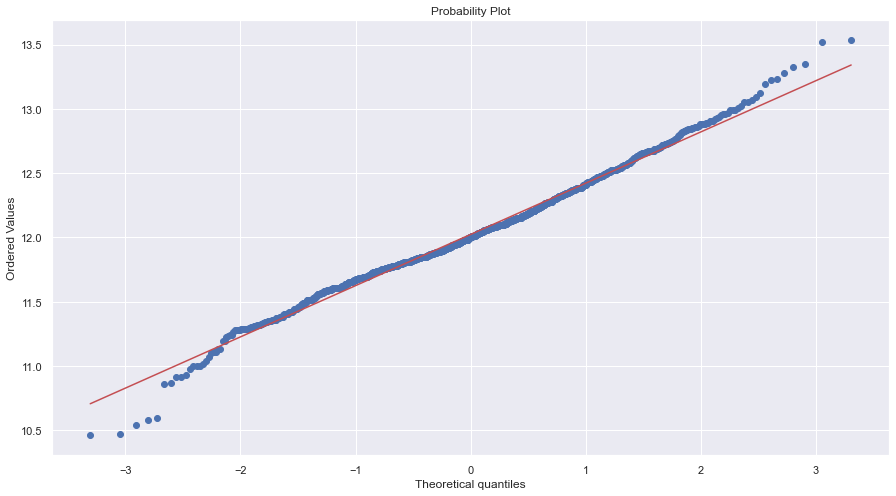

In [26]:
sns.distplot(dataset['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)